In [313]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

## ZAD 1
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

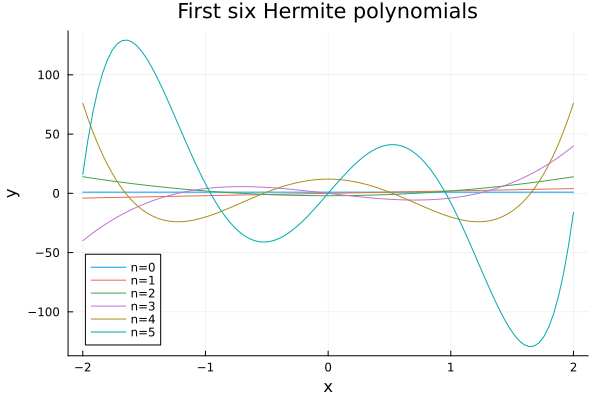

In [314]:
base = [1]
plot(Hermite(base), -2, 2, label="n=0")

for n in 1:5
    base = [0 for _ in 1:n]
    push!(base, 1)
    h = Hermite(base)
    plot!(h, -2, 2, label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six Hermite polynomials")

## ZAD 2
Narysować 6 pierwszych funkcji bazowych

In [315]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize
    if norm
        return normalize(app)
    end
    return app
end;

In [316]:
function base_h(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    return H_k
end;

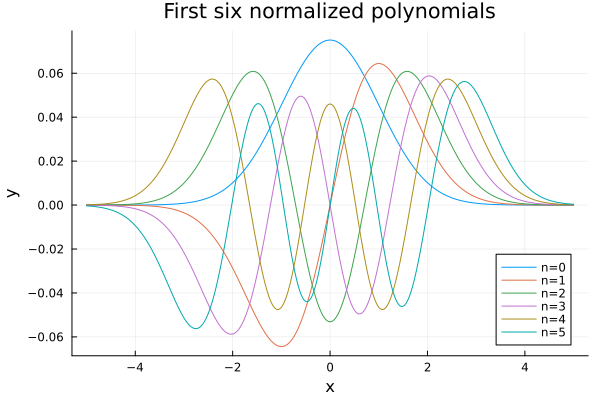

In [317]:
xx = -5:0.01:5
plot(xx, base_fun(0, xx), label="n=0")

for n in 1:5
    plot!(xx, base_fun(n, xx), label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six normalized polynomials")

## ZAD3
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [318]:
H = [base_h(i, xx) for i in 0:5];
F_wage = [base_fun(i, xx) for i in 0:5];


In [319]:
not_wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(H) 
    for (j, f_j) in enumerate(H)
        not_wage[i,j] = dot(f_i, f_j)
    end
end
not_wage

6×6 Matrix{Float64}:
  1001.0             -5.32907e-14  …   1.62082e6     7.27596e-11
    -5.32907e-14  33433.4             -8.73115e-11   1.05665e8
 31431.4              2.72848e-12      1.16899e8     1.86265e-9
    -4.54747e-13      1.80941e6       -2.32831e-8    7.82081e9
     1.62082e6       -8.73115e-11      8.08696e9    -1.43051e-6
     7.27596e-11      1.05665e8    …  -1.43051e-6    5.40772e11

In [320]:
wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(F_wage) 
    for (j, f_j) in enumerate(F_wage)
        wage[i,j] = dot(f_i, f_j)
    end
end
wage

6×6 Matrix{Float64}:
  1.0          -1.28479e-18  -5.27334e-11  …  -7.17021e-10  -6.47107e-19
 -1.28479e-18   1.0           5.31317e-18     -2.94442e-18  -1.53835e-8
 -5.27334e-11   5.31317e-18   1.0             -2.59736e-8   -2.97486e-19
  8.37625e-19  -1.52538e-9   -8.56829e-18      3.30805e-18  -3.09764e-7
 -7.17021e-10  -2.94442e-18  -2.59736e-8       1.0           1.72026e-18
 -6.47107e-19  -1.53835e-8   -2.97486e-19  …   1.72026e-18   1.0

Macierz dla wektorów znormalizowanych jest symetryczna i na przekątnych mamy wartości 1, zatem są one wektorami ortonormalnymi.

## ZAD4
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

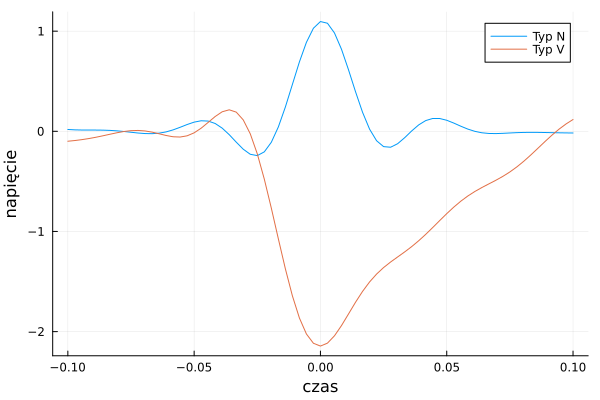

In [321]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [322]:
n = 4;

xx_ekg = ekg_data.time*50;
yy_ekgV = ekg_data.signalV;
yy_ekgN = ekg_data.signalN;


In [323]:
function type_v(n)
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgV, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgV]
    errors = []
    for i in 2:n+1
        push!(V_add, sum(V[1:i]))
        error =mean( (yy_ekgV - V_add[i-1]).^2 )
        push!(errors, error)
    end
    return V_add, errors
end;

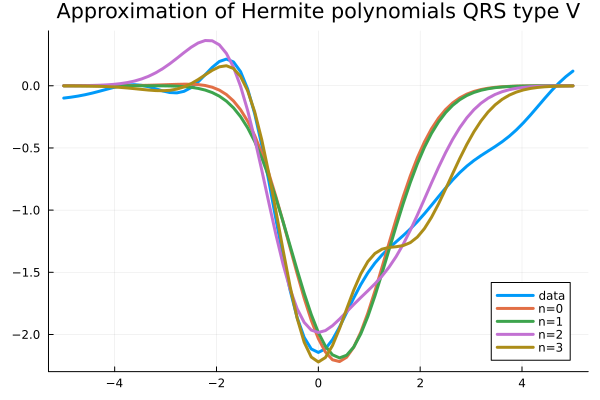

In [324]:
V_add, errors = type_v(n)
yy_ekgV = ekg_data.signalV
# push!(V_add, yy_ekgV)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5" ],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type V"
)


In [325]:
function type_n(n)
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgN, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgN]
    errors = []
    for i in 2:n+1
        push!(V_add, sum(V[1:i]))
        error =mean( (yy_ekgN - V_add[i-1]).^2 )
        push!(errors, error)
    end
    return V_add, errors
end;

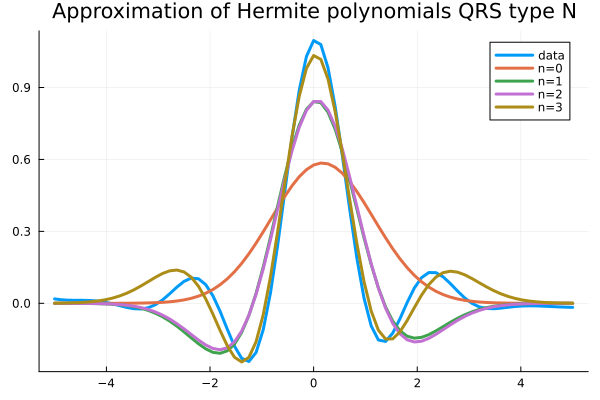

In [326]:
V_add, errors = type_n(n)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5"],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type N"
)

## ZAD5 
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [327]:
n = 12;
res, errors = type_v(n);

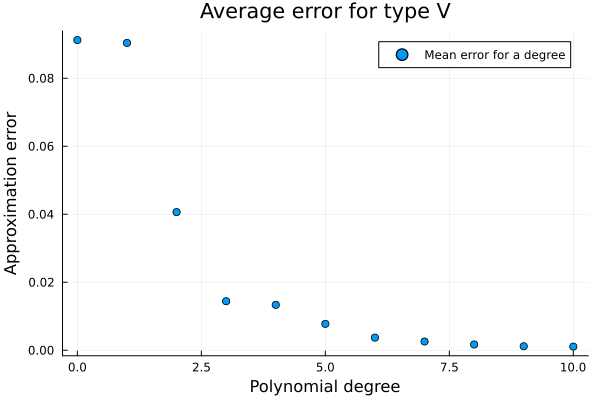

In [328]:
scatter(
    0:n-2,
    errors[2:end], 
    title = "Average error for type V",
    label = "Mean error for a degree",
    xlabel="Polynomial degree", 
    ylabel="Approximation error"
)

Wraz ze wzrostem stopnia wielomiany dają coraz lepsze przybliżenia

In [329]:
res, errors = type_n(n);

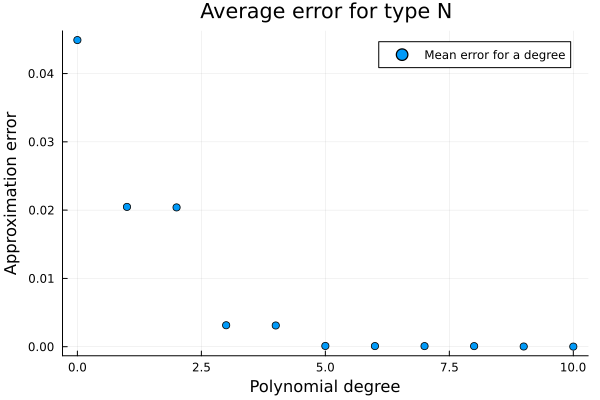

In [330]:
scatter(
    0:n-2,
    errors[2:end], 
    title = "Average error for type N",
    label = "Mean error for a degree",
    xlabel="Polynomial degree", 
    ylabel="Approximation error"
)